In [2]:
!pip install librosa

  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for librosa: filename=librosa-0.8.0-py3-none-any.whl size=201375 sha256=fe4e7d93b181a08b0d956b6b9fb42c973eebbcb5da9d0d0bac055086b78af14f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\aa\5a\92\d52f6f8560ff05a2525e6030a1903412df876714241fb76802
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=c52e9de2daa0b3c383b593ca8c6d7c8929071ca9aa99c2d74801cd316f4967ae
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=a897d9fdb2fb0b5410ff030bad1644d393ba6e48be391cfe7c7f08ca2705f304
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built librosa audioread resampy


In [3]:
#import necessary libraries
import librosa
import librosa.display

In [7]:
#filepath
filename='C:\\Users\\dell\\Jupyter Notebook\\Jupyter Workbook\\Daily task\\Audio classification\\Audio dataset\\NormalFanNoise\\listen_1619681854230.wav'

In [8]:
data, sample_rate = librosa.load(filename)  #load file in librosa to extract feature from audio file

In [9]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.15588255,
       -0.172217  , -0.10758681], dtype=float32)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

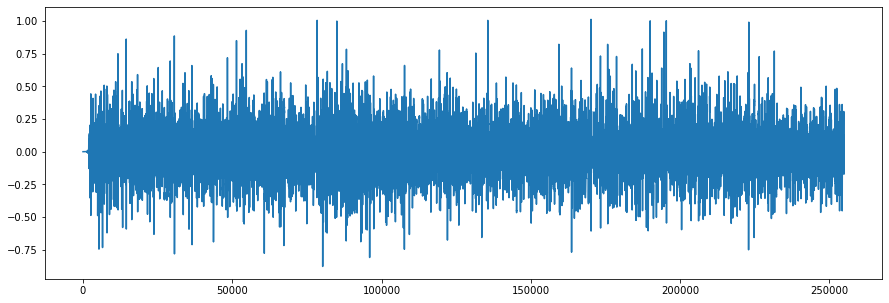

In [12]:
#plot wave of audio
plt.figure(figsize=(15,5))
plt.plot(data)

In [13]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)

In [14]:
print(mfccs.shape)

(40, 498)


In [46]:
#craete feature extractor function to extract feature from audio files 
def features_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [47]:
import numpy as np
features_extractor(filename)

array([-1.8408725e+02,  1.9090364e+02, -6.5472474e+00,  6.9835281e+01,
       -1.2132949e+01,  2.8640413e+01,  1.7672764e-01,  2.1742349e+00,
       -1.0729703e+00, -8.7123423e+00,  7.6583581e+00, -8.8585892e+00,
        1.0047846e+01, -4.3541551e+00,  2.3274660e-01, -2.1884985e+00,
       -1.8547668e+00,  2.2260115e+00, -4.9371362e+00,  1.7649610e+00,
       -5.1897745e+00,  1.6688553e+00, -3.5937066e+00, -1.3675336e+00,
       -1.1264790e+00, -3.2454054e+00,  5.1271170e-01, -4.7048430e+00,
        6.5273559e-01, -2.5778739e+00, -8.3489016e-02, -1.7538610e+00,
       -3.0470753e+00, -9.7869343e-01, -3.3089821e+00, -9.8401237e-01,
       -2.4648368e+00,  1.0008626e-01, -1.3101186e+00, -2.3919380e+00],
      dtype=float32)

In [66]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='C:\\Users\\dell\\Jupyter Notebook\\Jupyter Workbook\\Daily task\\Audio classification\\Audio dataset\\WeightedbladesNoise\\'


In [67]:
extracted_features=[]
for file in os.listdir(audio_dataset_path):
    class_label='WeightedbladesNoise'
    data=features_extractor(audio_dataset_path+file)
    extracted_features.append([data,class_label])

In [57]:
### converting extracted_features to Pandas dataframe
df1=pd.DataFrame(extracted_features,columns=['feature','class'])   ###labelling the data
df1.head()

,feature,class
0,"[-184.08725, 190.90364, -6.5472474, 69.83528, ...",Normal Fan
1,"[-188.95596, 184.57324, -5.796834, 69.49344, -...",Normal Fan
2,"[-187.72867, 227.37573, 1.7841598, 35.30324, -...",Normal Fan
3,"[-205.62836, 199.65625, 16.706049, 50.154755, ...",Normal Fan
4,"[-172.0737, 230.81796, -3.084025, 36.879505, -...",Normal Fan


In [58]:
df1.to_csv("NormalFan.csv")  ### convert dataframe to .csv file for audio classification

In [61]:
df2=pd.DataFrame(extracted_features,columns=['feature','class'])
df2.head()

,feature,class
0,"[-93.358574, 143.08846, -24.687855, 87.647224,...",Faulty Fan
1,"[-83.99258, 133.55707, -43.555065, 84.07892, -...",Faulty Fan
2,"[-85.85156, 138.25967, -18.470726, 90.875084, ...",Faulty Fan
3,"[-84.16158, 128.17197, -36.546913, 96.57095, -...",Faulty Fan
4,"[-103.80151, 147.52713, -20.799236, 86.50568, ...",Faulty Fan


In [63]:
df2.to_csv("FaultyFan.csv")

In [68]:
df3=pd.DataFrame(extracted_features,columns=['feature','class'])
df3.head()

,feature,class
0,"[-172.05176, 178.07889, -2.7258942, 64.90755, ...",WeightedbladesNoise
1,"[-131.54875, 141.76346, -46.163578, 86.30665, ...",WeightedbladesNoise
2,"[-154.2827, 141.59094, -45.067036, 66.92081, -...",WeightedbladesNoise
3,"[-123.77388, 141.92772, -51.178802, 66.29542, ...",WeightedbladesNoise
4,"[-74.84768, 150.31708, -69.574745, 72.876495, ...",WeightedbladesNoise


In [69]:
df3.to_csv("WeightedbladesNoise.csv")

In [193]:
###concat all the dataframe created for seperate folder of audio file
Final_data = pd.concat([df1,df2,df3],ignore_index=True)
Final_data

,feature,class
0,"[-184.08725, 190.90364, -6.5472474, 69.83528, ...",Normal Fan
1,"[-188.95596, 184.57324, -5.796834, 69.49344, -...",Normal Fan
2,"[-187.72867, 227.37573, 1.7841598, 35.30324, -...",Normal Fan
3,"[-205.62836, 199.65625, 16.706049, 50.154755, ...",Normal Fan
4,"[-172.0737, 230.81796, -3.084025, 36.879505, -...",Normal Fan
...,...,...
256,"[-83.35173, 143.92805, -77.120445, 73.46474, -...",WeightedbladesNoise
257,"[-84.10093, 145.62115, -70.71969, 74.50148, -3...",WeightedbladesNoise
258,"[-87.92287, 145.3846, -70.38933, 70.88522, -34...",WeightedbladesNoise
259,"[-86.80471, 148.24329, -81.79567, 77.111336, -...",WeightedbladesNoise


In [194]:
Final_data.to_csv("Final Data.csv")

In [195]:
### Split the dataset into independent and dependent dataset
X=np.array(Final_data['feature'].tolist())
y=np.array(Final_data['class'].tolist())

In [196]:
X.shape

(261, 40)

In [197]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [198]:
y.shape

(261, 3)

In [199]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

In [200]:
X_train.shape

(182, 40)

In [201]:
X_test.shape

(79, 40)

In [202]:
y_train.shape

(182, 3)

### Model Creation

In [203]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [205]:
### No of classes
num_labels=y.shape[1]
num_labels

3

In [206]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [207]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 200)               20200     
_________________________________________________________________
activation_17 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)              

In [208]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam') ### compile model for optimization

In [209]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 


checkpointer = ModelCheckpoint(filepath='C:\\Users\\dell\\Jupyter Notebook\\Jupyter Workbook\\Daily task\\Audio classification\\Saved models\\audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 32.3328 - accuracy: 0.3016 - val_loss: 6.1040 - val_accuracy: 0.4557

Epoch 00001: val_loss improved from inf to 6.10401, saving model to C:\Users\dell\Jupyter Notebook\Jupyter Workbook\Daily task\Audio classification\Saved models\audio_classification.hdf5
Epoch 2/100
6/6 [==============================] - 0s 23ms/step - loss: 22.2420 - accuracy: 0.3624 - val_loss: 5.1626 - val_accuracy: 0.4557

Epoch 00002: val_loss improved from 6.10401 to 5.16258, saving model to C:\Users\dell\Jupyter Notebook\Jupyter Workbook\Daily task\Audio classification\Saved models\audio_classification.hdf5
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 15.1855 - accuracy: 0.4674 - val_loss: 2.1685 - val_accuracy: 0.5823

Epoch 00003: val_loss improved from 5.16258 to 2.16855, saving model to C:\Users\dell\Jupyter Notebook\Jupyter Workbook\Daily task\Audio classification\Saved models\audio_classification.hdf5
Epoch

In [210]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

1.0


In [211]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [212]:
y_test = np.argmax(y_test, axis=1)
y_test

array([0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2], dtype=int64)

In [213]:
prediction=model.predict_classes(X_test)
prediction

array([0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2], dtype=int64)

### Model Evaluation

In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[21,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 26]], dtype=int64)

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        26

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



### Testing the model

In [216]:
filename="C:\\Users\\dell\\Jupyter Notebook\\Jupyter Workbook\\Daily task\\Audio classification\\Test data\\Table fan (1).wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-1.46573975e+02  1.41787338e+02 -3.29798813e+01  5.98881454e+01
 -2.31710835e+01  3.10517788e+01  1.11622868e+01  1.61389732e+01
  1.21992388e+01  9.64996815e+00  1.44095688e+01 -5.75796652e+00
  1.47770519e+01  7.22794890e-01  9.57946777e+00 -6.74866617e-01
  7.58678555e-01  5.06404924e+00  1.13942124e-01  5.87181091e+00
 -1.03177726e+00  4.87688398e+00 -5.67782831e+00 -4.52117532e-01
 -1.13828647e+00 -9.14000869e-01  1.92798066e+00 -4.90960836e+00
 -1.48888648e+00 -5.22576094e+00 -9.04216886e-01 -3.89231467e+00
 -2.62602258e+00  7.16412207e-03 -1.48836255e+00 -8.07164550e-01
 -3.87436485e+00 -2.76414466e+00 -3.06100988e+00 -2.86264729e+00]
[[-1.46573975e+02  1.41787338e+02 -3.29798813e+01  5.98881454e+01
  -2.31710835e+01  3.10517788e+01  1.11622868e+01  1.61389732e+01
   1.21992388e+01  9.64996815e+00  1.44095688e+01 -5.75796652e+00
   1.47770519e+01  7.22794890e-01  9.57946777e+00 -6.74866617e-01
   7.58678555e-01  5.06404924e+00  1.13942124e-01  5.87181091e+00
  -1.03177726e+00  

array(['WeightedbladesNoise'], dtype='<U19')